<a href="https://colab.research.google.com/github/Reddythedeveloper/internsavy_task3/blob/main/Seg_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows to understand the data
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode 'Genre' column (if it's categorical)
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

# Standardize numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


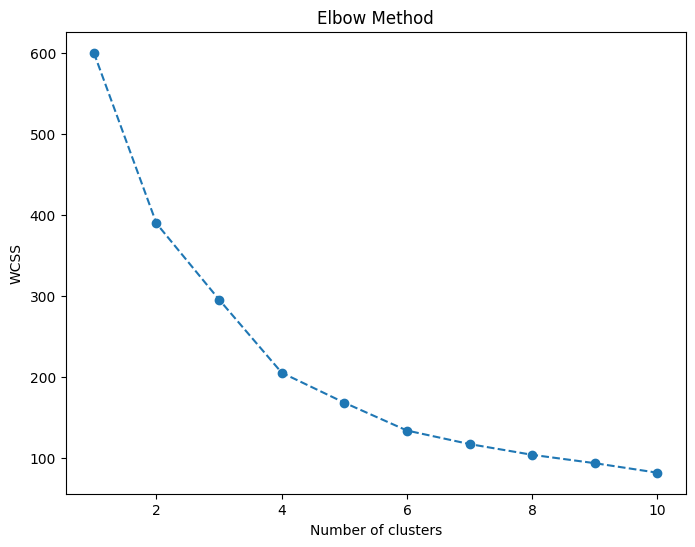

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
# Perform K-Means clustering with the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Display the first few rows of the dataset with cluster labels
print(data.head())


   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1      1   19                  15                      39        2
1           2      1   21                  15                      81        2
2           3      0   20                  16                       6        3
3           4      0   23                  16                      77        2
4           5      0   31                  17                      40        2


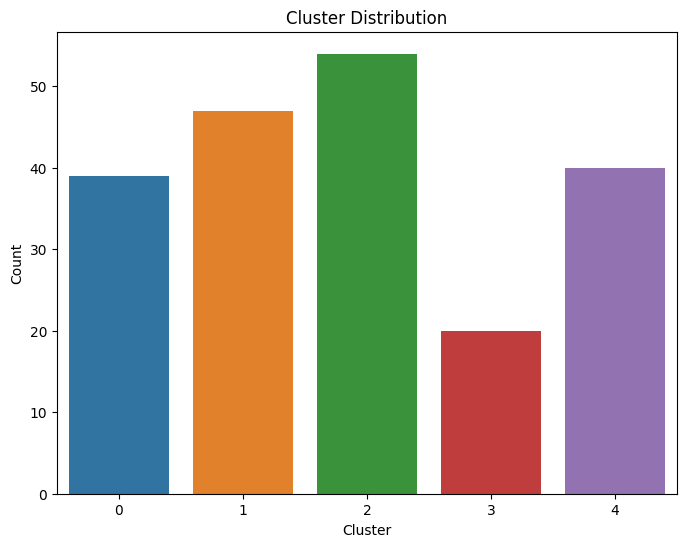

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Cluster')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


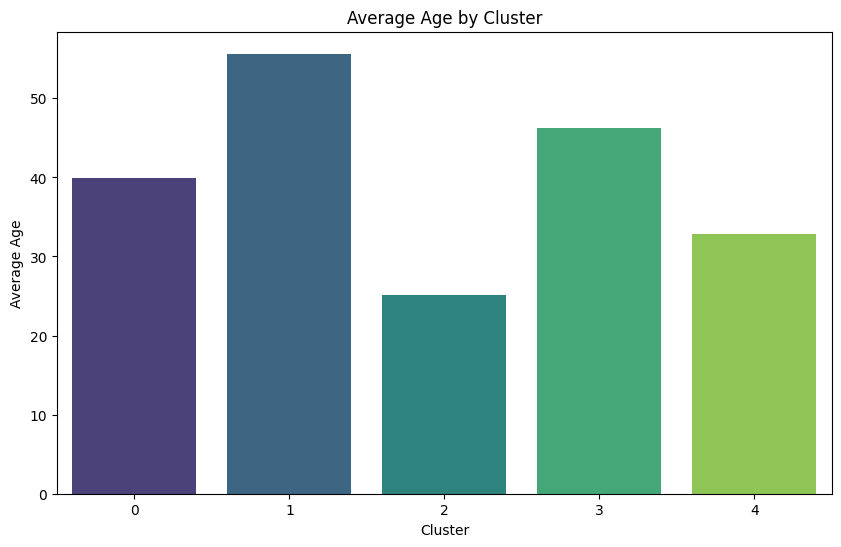

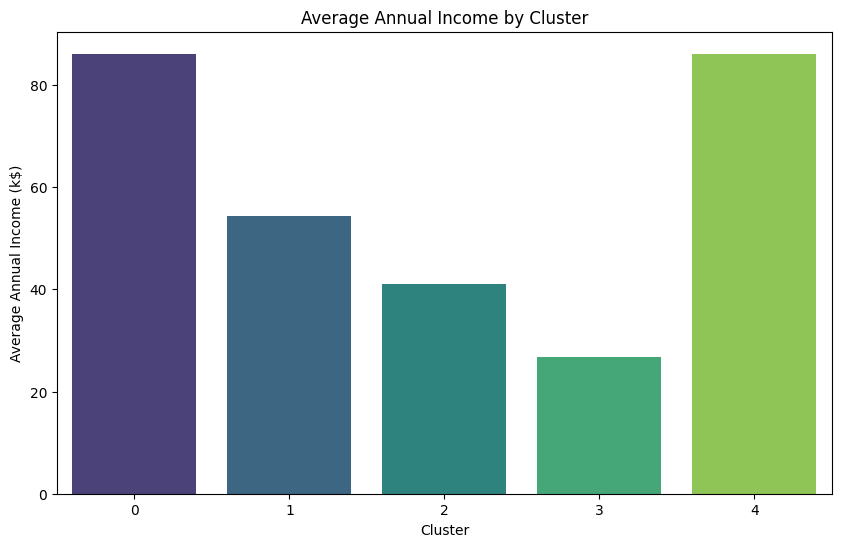

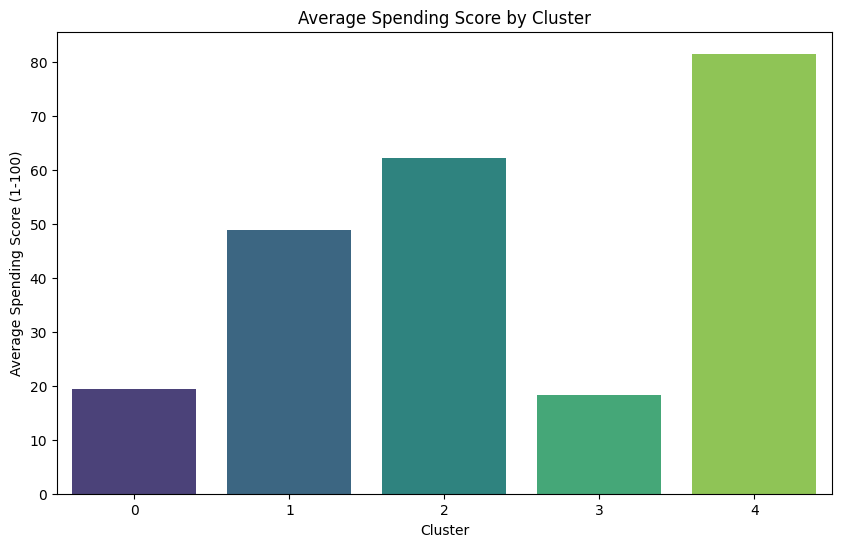

In [7]:
cluster_profiles = data.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_profiles, x=cluster_profiles.index, y='Age', palette='viridis')
plt.title('Average Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_profiles, x=cluster_profiles.index, y='Annual Income (k$)', palette='viridis')
plt.title('Average Annual Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Annual Income (k$)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_profiles, x=cluster_profiles.index, y='Spending Score (1-100)', palette='viridis')
plt.title('Average Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score (1-100)')
plt.show()


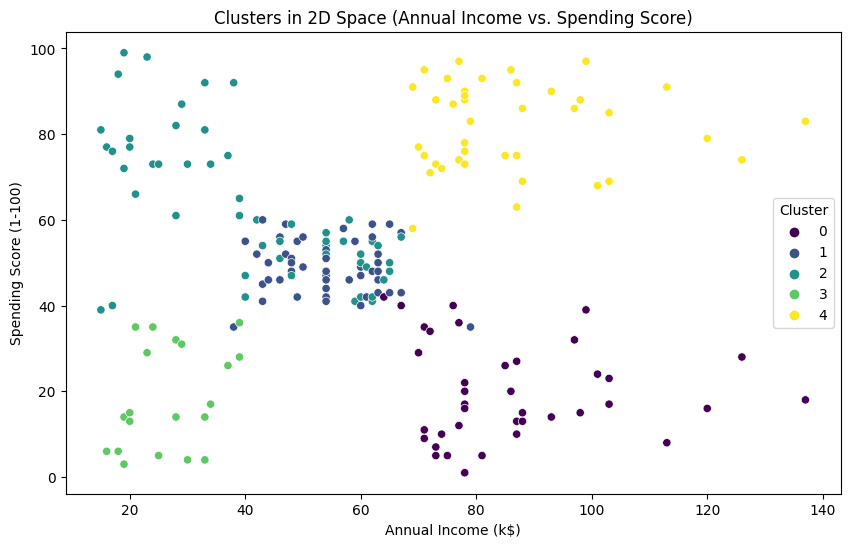

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters in 2D Space (Annual Income vs. Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


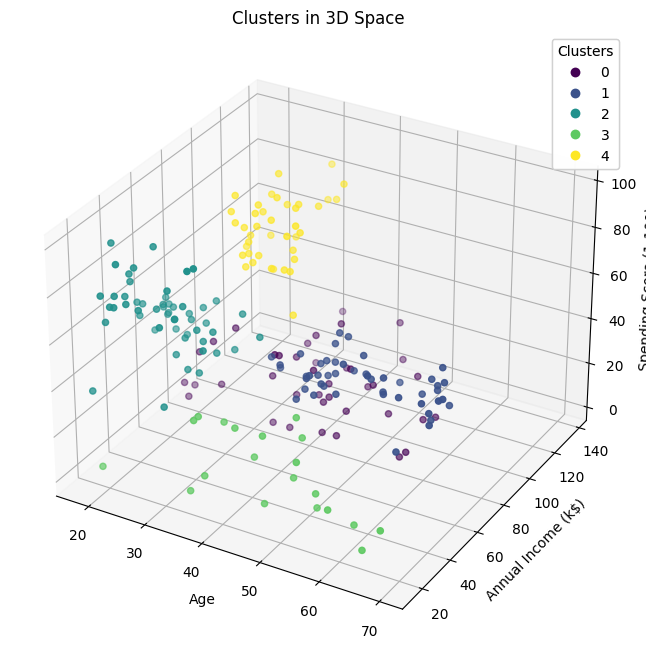

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.title('Clusters in 3D Space')
plt.show()
